Kirill Komarov, Artur Kozubov 54 Dataset. 50%, 50%.

# Aktivita na cvičení

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch
from torch.utils.data import DataLoader, TensorDataset

## Data loading

In [83]:
stocks = pd.read_csv('./bonus/sp500_stocks.csv')
stocks.info()
stocks.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1887759 entries, 0 to 1887758
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date       object 
 1   Symbol     object 
 2   Adj Close  float64
 3   Close      float64
 4   High       float64
 5   Low        float64
 6   Open       float64
 7   Volume     float64
dtypes: float64(6), object(2)
memory usage: 115.2+ MB


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,43.783863,69.414719,69.774246,69.122070,69.473244,3640265.0
1,2010-01-05,MMM,43.509640,68.979935,69.590302,68.311035,69.230766,3405012.0
2,2010-01-06,MMM,44.126667,69.958191,70.735786,69.824417,70.133781,6301126.0
3,2010-01-07,MMM,44.158310,70.008362,70.033447,68.662209,69.665550,5346240.0
4,2010-01-08,MMM,44.469475,70.501671,70.501671,69.648827,69.974915,4073337.0


In [84]:
index = pd.read_csv('./bonus/sp500_index.csv')
index.info()
index.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2517 non-null   object 
 1   S&P500  2517 non-null   float64
dtypes: float64(1), object(1)
memory usage: 39.5+ KB


,Date,S&P500
0,2014-12-01,2053.44
1,2014-12-02,2066.55
2,2014-12-03,2074.33
3,2014-12-04,2071.92
4,2014-12-05,2075.37


In [85]:
companies = pd.read_csv('./bonus/sp500_companies.csv')
companies.info()
companies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exchange             503 non-null    object 
 1   Symbol               503 non-null    object 
 2   Shortname            503 non-null    object 
 3   Longname             503 non-null    object 
 4   Sector               503 non-null    object 
 5   Industry             503 non-null    object 
 6   Currentprice         503 non-null    float64
 7   Marketcap            503 non-null    int64  
 8   Ebitda               474 non-null    float64
 9   Revenuegrowth        500 non-null    float64
 10  City                 503 non-null    object 
 11  State                483 non-null    object 
 12  Country              503 non-null    object 
 13  Fulltimeemployees    494 non-null    float64
 14  Longbusinesssummary  503 non-null    object 
 15  Weight               503 non-null    flo

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,237.33,3587432775680,1.346610e+11,0.061,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.063810
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,138.25,3385742589952,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.060223
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,423.46,3148374343680,1.365520e+11,0.160,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.056000
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,207.89,2185963372544,1.115830e+11,0.110,Seattle,WA,United States,1551000.0,"Amazon.com, Inc. engages in the retail sale of...",0.038882
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,168.95,2080348962816,1.234700e+11,0.151,Mountain View,CA,United States,181269.0,Alphabet Inc. offers various products and plat...,0.037003


## Data exploration

In [86]:
print(stocks.describe())

          Adj Close         Close          High           Low          Open  \
count  1.767368e+06  1.767368e+06  1.767368e+06  1.767368e+06  1.767368e+06   
mean   9.756522e+01  1.056547e+02  1.068040e+02  1.044486e+02  1.056350e+02   
std    2.168748e+02  2.172462e+02  2.197270e+02  2.146762e+02  2.171547e+02   
min    2.036069e-01  2.220000e-01  2.262500e-01  2.162500e-01  2.180000e-01   
25%    2.872068e+01  3.501000e+01  3.540000e+01  3.461000e+01  3.500000e+01   
50%    5.360977e+01  6.304238e+01  6.367862e+01  6.237000e+01  6.302000e+01   
75%    1.034511e+02  1.142200e+02  1.154000e+02  1.130000e+02  1.142100e+02   
max    9.924400e+03  9.924400e+03  9.964770e+03  9.794000e+03  9.914170e+03   

             Volume  
count  1.767368e+06  
mean   6.989389e+06  
std    3.318534e+07  
min    0.000000e+00  
25%    1.001400e+06  
50%    2.180206e+06  
75%    5.000200e+06  
max    3.692928e+09  


In [87]:
print(index.describe())

            S&P500
count  2517.000000
mean   3322.599007
std    1062.641587
min    1829.080000
25%    2404.390000
50%    2984.870000
75%    4183.960000
max    6032.380000


In [88]:
print(companies.describe())

       Currentprice     Marketcap        Ebitda  Revenuegrowth  \
count    503.000000  5.030000e+02  4.740000e+02     500.000000   
mean     232.918091  1.117704e+11  7.031397e+09       0.070484   
std      528.709518  3.267621e+11  1.622777e+10       0.180071   
min        9.020000  5.924404e+09 -3.991000e+09      -0.602000   
25%       71.735000  2.074613e+10  1.623194e+09       0.002000   
50%      132.310000  3.846988e+10  2.941705e+09       0.050000   
75%      243.990000  8.546197e+10  6.017250e+09       0.109000   
max     9235.580000  3.587433e+12  1.495470e+11       1.632000   

       Fulltimeemployees      Weight  
count       4.940000e+02  503.000000  
mean        5.774496e+04    0.001988  
std         1.394693e+05    0.005812  
min         2.800000e+01    0.000105  
25%         1.020000e+04    0.000369  
50%         2.159500e+04    0.000684  
75%         5.476225e+04    0.001520  
max         2.100000e+06    0.063810  


## Data merging

In [89]:
df_start = pd.merge(stocks, companies, on='Symbol', how='inner')

In [90]:
df = pd.merge(df_start, index, on='Date', how='inner')

In [91]:
df.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Exchange,Shortname,...,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight,S&P500
0,2014-12-01,MMM,94.401512,132.240799,133.369568,131.989960,132.399673,2992512.0,NYQ,3M Company,...,72714960896,8.117000e+09,0.004,Saint Paul,MN,United States,85000.0,3M Company provides diversified technology ser...,0.001293,2053.44
1,2014-12-02,MMM,95.857910,134.280930,134.431442,132.558533,132.759201,2995262.0,NYQ,3M Company,...,72714960896,8.117000e+09,0.004,Saint Paul,MN,United States,85000.0,3M Company provides diversified technology ser...,0.001293,2066.55
2,2014-12-03,MMM,96.848724,135.668900,135.819397,133.921402,134.698990,3634405.0,NYQ,3M Company,...,72714960896,8.117000e+09,0.004,Saint Paul,MN,United States,85000.0,3M Company provides diversified technology ser...,0.001293,2074.33
3,2014-12-04,MMM,96.848724,135.668900,136.220734,134.531769,135.451508,2588383.0,NYQ,3M Company,...,72714960896,8.117000e+09,0.004,Saint Paul,MN,United States,85000.0,3M Company provides diversified technology ser...,0.001293,2071.92
4,2014-12-05,MMM,96.854668,135.677261,136.204010,135.351166,135.785950,2060230.0,NYQ,3M Company,...,72714960896,8.117000e+09,0.004,Saint Paul,MN,United States,85000.0,3M Company provides diversified technology ser...,0.001293,2075.37


## Data cleaning

In [92]:
print(df.isnull().sum())

Date                       0
Symbol                     0
Adj Close              49295
Close                  49295
High                   49295
Low                    49295
Open                   49295
Volume                 49295
Exchange                   0
Shortname                  0
Longname                   0
Sector                     0
Industry                   0
Currentprice               0
Marketcap                  0
Ebitda                 72993
Revenuegrowth           7551
City                       0
State                  50340
Country                    0
Fulltimeemployees      22653
Longbusinesssummary        0
Weight                     0
S&P500                     0
dtype: int64


In [93]:
df.dropna(inplace=True)

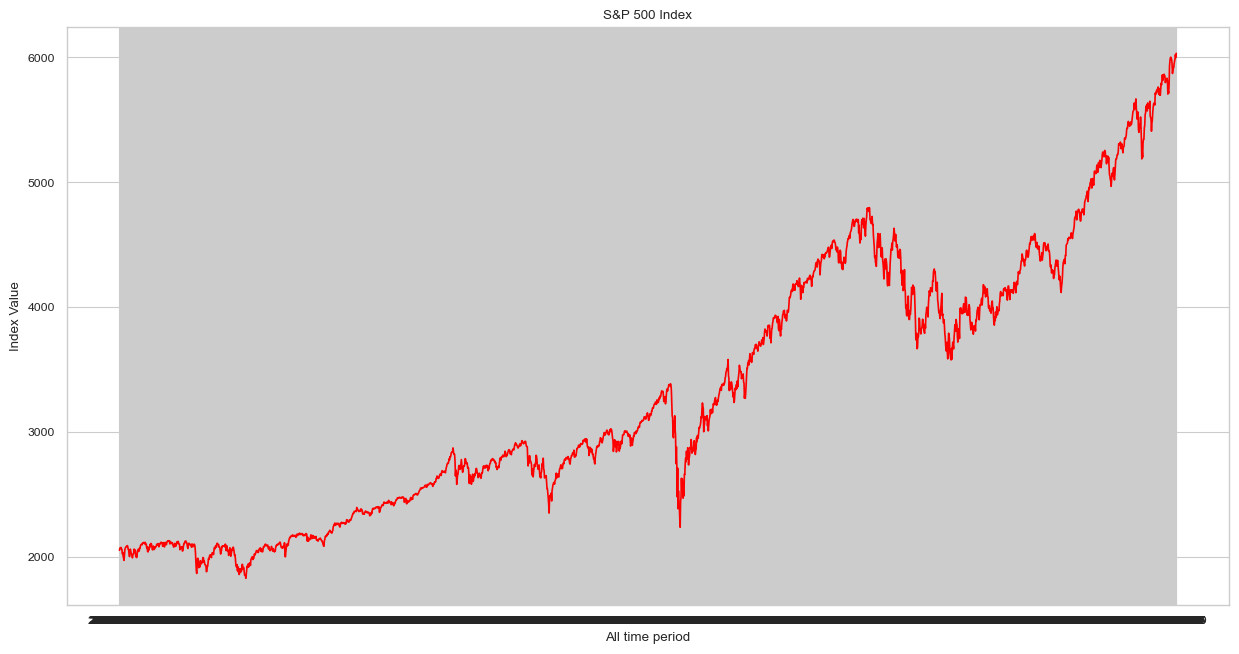

In [94]:
plt.figure(figsize=(15, 7.5))
plt.plot(index['Date'], index['S&P500'], color='red')
plt.xlabel('All time period')
plt.ylabel('Index Value')
plt.title('S&P 500 Index')
plt.show()


## Data normalization

In [95]:
features = ['Sector', 'Industry']
one_hot = pd.get_dummies(df[features], prefix=features)
df = pd.concat([df.drop(features, axis=1), one_hot], axis=1)

In [96]:
scal = MinMaxScaler(feature_range=(0, 1))
scale_colum = ['Open', 'High', 'Low', 'Close', 'Volume', 'S&P500']
df[scale_colum] = scal.fit_transform(df[scale_colum])

## Data splitting

In [97]:
train_size = int(len(df) * 0.8)
# test_size = len(df) - train_size
train, test = df[:train_size], df[train_size:]

## PyTorch Dataset

In [98]:
look_back = 10

def create_dataset(data, look_back):
    numeric_data = data.select_dtypes(include=[np.number]).values

    sequences, targets = [], []
    for i in range(len(numeric_data) - look_back):
        sequences.append(numeric_data[i:i + look_back])
        targets.append(numeric_data[i + look_back, 3])

    sequences = np.array(sequences, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)

    return torch.tensor(sequences).float(), torch.tensor(targets).float()

train_sequences, train_targets = create_dataset(train, look_back)
test_sequences, test_targets = create_dataset(test, look_back)

# Создание DataLoader для обучения и тестирования
train_dataset = TensorDataset(train_sequences, train_targets)
test_dataset = TensorDataset(test_sequences, test_targets)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

## ML/DL methods for dataset for 4.2

Based on the task and the dataset we are working with, we can see that recurrent neural networks (RNN) are the most suitable, especially their extended versions, such as LSTM (Long Short-Term Memory) or GRU (Gated Recurrent Unit). They are well suited for dealing with sequential data in long term dependencies